# ABCP 
## Cluster Por Meses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Leemos los csv por mes

j = 3  # Mes

frames = []

for i in range(1,32):
        day  = str(i)
        month = str(j)
        if (i<10):
            day = '0' + str(i)
        if (j<10):
            month = '0' + str(j)
        file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\ABPC\\abpc_2018-' + month + '-' + day + '.csv'
        abpc_ = pd.read_csv(file_name, delimiter=';', names=['UPDATE','ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','EXTRA 1','EXTRA 2'])
        abpc_2 = abpc_.drop([0],axis=0)
        frames.append(abpc_2)
        

abpc = pd.concat(frames)

cols = ['ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','UPDATE','EXTRA 1','EXTRA 2']

abpc = abpc[cols]

abpc.reset_index(inplace=True,drop=True)

In [3]:
abpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548023 entries, 0 to 548022
Data columns (total 15 columns):
ID                                                548023 non-null object
FLIGHTID                                          547326 non-null object
LECTOR ID                                         548023 non-null object
CHECK DATE                                        548023 non-null object
STATUS                                            548023 non-null object
REASON                                            29392 non-null object
CHECKIN SEQUENCE NUMBER                           547796 non-null object
PNR                                               546674 non-null object
DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE    547795 non-null object
DEPARTURE FLIGHT AIRLINE IATA CODE                547799 non-null object
DEPARTURE FLIGHT NUMBER                           547799 non-null object
DEPARTURE FLIGHT SOBT                             547799 non-null object
UPDATE        

In [4]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2
0,10369117,10354067,aia-abpc-abg003,01/03/2018 00:38,PASSED,NaN,0085,WEVZSJ,FCO,A3,0650,01/03/2018 06:50,01/03/2018 00:43,NaN,NaN
1,10369118,10354022,aia-abpc-wks006,01/03/2018 01:06,PASSED,NaN,0134,J43LL8,LCA,A3,0902,01/03/2018 06:15,01/03/2018 01:12,NaN,NaN
2,10369119,10354052,aia-abpc-abg004,01/03/2018 01:14,PASSED,NaN,0024,R34EAS,CDG,A3,0610,01/03/2018 06:35,01/03/2018 01:15,NaN,NaN
3,10369120,10346903,aia-abpc-abg015,01/03/2018 01:32,PASSED,NaN,0058,WMUPZX,FCO,AZ,0717,01/03/2018 03:55,01/03/2018 01:35,NaN,NaN
4,10369121,10346927,aia-abpc-abg015,01/03/2018 01:34,PASSED,NaN,0022,U64UKK,SKG,OA,0106,01/03/2018 05:00,01/03/2018 01:35,NaN,NaN


In [5]:
abpc['STATUS'].unique()

array(['PASSED', 'UNKNOWN', 'ERROR', 'NOTPASSED', 'REJECTED', 'DENIED',
       'EXIT'], dtype=object)

In [6]:
for reason in abpc['STATUS'].unique():
    num = abpc['ID'].loc[abpc['STATUS']==reason].count()
    print('Num passengers, STATUS:',reason)
    print(num)

Num passengers, STATUS: PASSED
528902
Num passengers, STATUS: UNKNOWN
17234
Num passengers, STATUS: ERROR
285
Num passengers, STATUS: NOTPASSED
165
Num passengers, STATUS: REJECTED
187
Num passengers, STATUS: DENIED
1086
Num passengers, STATUS: EXIT
164


In [7]:
abpc = abpc.loc[abpc['STATUS']=='PASSED']

In [8]:
abpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528902 entries, 0 to 548022
Data columns (total 15 columns):
ID                                                528902 non-null object
FLIGHTID                                          528874 non-null object
LECTOR ID                                         528902 non-null object
CHECK DATE                                        528902 non-null object
STATUS                                            528902 non-null object
REASON                                            10271 non-null object
CHECKIN SEQUENCE NUMBER                           528899 non-null object
PNR                                               527804 non-null object
DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE    528898 non-null object
DEPARTURE FLIGHT AIRLINE IATA CODE                528902 non-null object
DEPARTURE FLIGHT NUMBER                           528902 non-null object
DEPARTURE FLIGHT SOBT                             528902 non-null object
UPDATE        

In [9]:
# Puede haber alguna fila que tenga un campo de más por error

abpc.loc[pd.isnull(abpc['EXTRA 1'])!=True]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2
39822,10421509,10390045,aia-abpc-wks003,03/03/2018 07:41,PASSED,InvalidFlightStateAccept,PaxAlreadyPassedAccept,0183,XQKZHI,SKG,FR,0018,03/03/2018 07:46,03/03/2018 06:20,NaN
86032,10474942,NaN,aia-abpc-wks007,05/03/2018 16:35,PASSED,FastTrackIndicatorRequiredAccept,UnknownFlightAccept,0009,W8AGPP,SKG,OA,0130,05/03/2018 16:38,04/03/2018 22:00,NaN
86035,10474945,10445560,aia-abpc-wks007,05/03/2018 16:35,PASSED,FastTrackIndicatorRequiredAccept,InvalidFlightStateAccept,0131,W8AGPP,SKG,OA,0118,05/03/2018 16:38,05/03/2018 13:30,NaN
86079,10474996,NaN,aia-abpc-wks007,05/03/2018 16:38,PASSED,FastTrackIndicatorRequiredAccept,UnknownFlightAccept,0009,W8AGPP,SKG,OA,0130,05/03/2018 16:43,04/03/2018 22:00,NaN
86607,10475593,NaN,aia-abpc-wks007,05/03/2018 17:12,PASSED,FastTrackIndicatorRequiredAccept,UnknownFlightAccept,0076,PZT7NI,RHO,OA,0218,05/03/2018 17:13,05/03/2018 22:00,NaN
94633,10485154,10461643,aia-abpc-wks007,06/03/2018 07:18,PASSED,FastTrackIndicatorRequiredAccept,InvalidFlightStateAccept,0118,PDIDYE,MAD,A3,0686,06/03/2018 07:22,06/03/2018 07:05,NaN
154847,10558000,10402174,aia-abpc-wks006,09/03/2018 17:16,PASSED,InvalidDateAccept,InvalidFlightStateAccept,0131,VGNPAN,LCA,A3,0908,09/03/2018 17:18,03/03/2018 16:35,NaN
155002,10558187,10430450,aia-abpc-wks006,09/03/2018 17:24,PASSED,InvalidDateAccept,InvalidFlightStateAccept,0043,VAYRK5,IKA,A3,0948,09/03/2018 17:28,04/03/2018 19:55,NaN
178046,10584969,10502445,aia-abpc-wks002,11/03/2018 06:00,PASSED,InvalidFlightStateAccept,PaxAlreadyPassedAccept,0173,Q2GYKA,CRL,FR,1196,11/03/2018 06:05,08/03/2018 07:30,NaN
191484,10600158,NaN,aia-abpc-wks006,11/03/2018 16:20,PASSED,InvalidDateAccept,UnknownFlightAccept,0003,NaN,TLV,LY,0546,11/03/2018 16:21,11/03/2018 22:00,NaN


In [10]:
# Puede haber alguna fila que tenga un campo de más por error

abpc.loc[pd.isnull(abpc['EXTRA 2'])!=True]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2


In [11]:
abpc.loc[(pd.isnull(abpc['EXTRA 1'])!=True)&(pd.isnull(abpc['EXTRA 2'])!=True)]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2


In [12]:
# Eliminamos las filas intratables (muchos campos erroneos y no comprensibles)

for index in abpc.loc[(pd.isnull(abpc['EXTRA 1'])!=True)&(pd.isnull(abpc['EXTRA 2'])!=True)].index.values:
    abpc = abpc.drop([index],axis=0)
    
abpc.reset_index(inplace=True,drop=True)

In [13]:
for index in abpc.loc[pd.isnull(abpc['EXTRA 1'])!=True].index.values:
    reason_1 = abpc['REASON'].iloc[index]
    reason_2 = abpc['CHECKIN SEQUENCE NUMBER'].iloc[index]
    if ((reason_1 != None)&(reason_2 != None)):
        reason = [reason_1 + '_&_' + reason_2]
        new_row = list(abpc.iloc[index,0:5].values) + reason + list(abpc.iloc[index,7:12].values) + [abpc.iloc[index,13]] + [abpc.iloc[index,12]] + [None,None]
        abpc.iloc[index,:] = new_row

abpc.reset_index(inplace=True,drop=True)

In [14]:
abpc.loc[pd.isnull(abpc['EXTRA 1'])!=True]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2


In [15]:
abpc.loc[pd.isnull(abpc['EXTRA 2'])!=True]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2


### Añadimos el campo LOCAL (Vuelo internacional o local)

In [16]:
file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\DIC_AIRP_Athenas.csv'
ap = pd.read_csv(file_name,delimiter=';',header=0)

In [17]:
ap_sheng = ap.loc[(ap['SWITCH_SCHENGEN']==1)]

ap_sheng_loc = ap_sheng.loc[ap_sheng['SWITCH_LOCAL']==1]
ap_sheng_int = ap_sheng.loc[ap_sheng['SWITCH_LOCAL']==0]

In [18]:
abpc['LOCAL'] = list(map(lambda x: x in ap_sheng_loc['CODE'].values,abpc['DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE']))
abpc['SCHENGEN'] = list(map(lambda x: x in ap_sheng['CODE'].values,abpc['DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE']))

In [19]:
abpc['LOCAL'].sum()

189941

In [20]:
abpc['SCHENGEN'].sum()

405560

### Preprocesamiento de datos

In [21]:
# Encode Categorycal Variables

# STATUS

labelencoder_X = LabelEncoder()
abpc['STATUS'] = labelencoder_X.fit_transform(abpc['STATUS'])

# 0 PASSED
# 1 NOT PASSED

In [22]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2,LOCAL,SCHENGEN
0,10369117,10354067,aia-abpc-abg003,01/03/2018 00:38,0,NaN,0085,WEVZSJ,FCO,A3,0650,01/03/2018 06:50,01/03/2018 00:43,NaN,NaN,False,True
1,10369118,10354022,aia-abpc-wks006,01/03/2018 01:06,0,NaN,0134,J43LL8,LCA,A3,0902,01/03/2018 06:15,01/03/2018 01:12,NaN,NaN,False,False
2,10369119,10354052,aia-abpc-abg004,01/03/2018 01:14,0,NaN,0024,R34EAS,CDG,A3,0610,01/03/2018 06:35,01/03/2018 01:15,NaN,NaN,False,True
3,10369120,10346903,aia-abpc-abg015,01/03/2018 01:32,0,NaN,0058,WMUPZX,FCO,AZ,0717,01/03/2018 03:55,01/03/2018 01:35,NaN,NaN,False,True
4,10369121,10346927,aia-abpc-abg015,01/03/2018 01:34,0,NaN,0022,U64UKK,SKG,OA,0106,01/03/2018 05:00,01/03/2018 01:35,NaN,NaN,True,True


In [23]:
# Hay algun nulo en las fechas?

nulls_sobt = abpc['DEPARTURE FLIGHT SOBT'].isnull().sum()

nulls_check = abpc['CHECK DATE'].isnull().sum()


In [24]:
abpc.reset_index(inplace=True,drop=True)

to_drop_ds = []
if (nulls_sobt!=0):
    for ind in range(0,len(abpc['DEPARTURE FLIGHT SOBT'].values)):
        date = abpc['DEPARTURE FLIGHT SOBT'].iloc[ind]
        if (pd.isnull(date)):
            print('DEPARTURE FLIGHT SOBT:',date,'---')
            to_drop_ds.append(ind)
        
to_drop_cd = []
if (nulls_check!=0):
    for ind in range(0,len(abpc['CHECK DATE'].values)):
        date = abpc['CHECK DATE'].iloc[ind]
        if (pd.isnull(date)):
            print('CHECK DATE:',date,'---')
            to_drop_cd.append(ind)
        
to_drop = list(set(to_drop_ds) | set(to_drop_cd))

In [25]:
to_drop_ds

[]

In [26]:
to_drop_cd

[]

In [27]:
to_drop

[]

In [28]:
abpc.drop(to_drop,inplace=True) # Solo una vez!!

abpc.reset_index(inplace=True,drop=True)

In [29]:
# Dates to Datetime

abpc.reset_index(inplace=True,drop=True)

# Check-Date

date_check = pd.to_datetime(abpc['CHECK DATE'],format = '%d/%m/%Y %H:%M')

# Departure Date

date_dep = pd.to_datetime(abpc['DEPARTURE FLIGHT SOBT'],format = '%d/%m/%Y %H:%M')

# Vemos si hay alguna fecha que no se haya convertido bien o es nula

nulls_check_ = date_check.isnull().sum()

nulls_sobt_ = date_dep.isnull().sum()

if (nulls_check_!=0):
    for ind in range(0,len(date_check)):
        if (pd.isnull(date_check[ind])):
            print(ind)
            print('CHECK DATE:',date_check[ind],'---')

if (nulls_sobt_!=0):
    for ind in range(0,len(date_dep)):
        if (pd.isnull(date_dep[ind])):
            print(ind)
            print('DEPARTURE FLIGHT SOBT:',date_dep[ind],'---')


In [30]:
# Dates to String Format %Y-%m-%d %H:%M:%S

abpc['CHECK DATE']=date_check.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

abpc['DEPARTURE FLIGHT SOBT']=date_dep.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [31]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2,LOCAL,SCHENGEN
0,10369117,10354067,aia-abpc-abg003,2018-03-01 00:38:00,0,NaN,0085,WEVZSJ,FCO,A3,0650,2018-03-01 06:50:00,01/03/2018 00:43,NaN,NaN,False,True
1,10369118,10354022,aia-abpc-wks006,2018-03-01 01:06:00,0,NaN,0134,J43LL8,LCA,A3,0902,2018-03-01 06:15:00,01/03/2018 01:12,NaN,NaN,False,False
2,10369119,10354052,aia-abpc-abg004,2018-03-01 01:14:00,0,NaN,0024,R34EAS,CDG,A3,0610,2018-03-01 06:35:00,01/03/2018 01:15,NaN,NaN,False,True
3,10369120,10346903,aia-abpc-abg015,2018-03-01 01:32:00,0,NaN,0058,WMUPZX,FCO,AZ,0717,2018-03-01 03:55:00,01/03/2018 01:35,NaN,NaN,False,True
4,10369121,10346927,aia-abpc-abg015,2018-03-01 01:34:00,0,NaN,0022,U64UKK,SKG,OA,0106,2018-03-01 05:00:00,01/03/2018 01:35,NaN,NaN,True,True


In [32]:
# Adding a variable: Dwell Time (Check - Departure)

# Dwell Time
dwell_time = date_dep - date_check
abpc['DWELL TIME'] = dwell_time.map(lambda x: x.total_seconds()/3600)

In [33]:
# Adding a variable: DEPARTURE SOBT HOUR , DEPARTURE SOBT WEEKDAY

abpc['DEPARTURE SOBT HOUR'] = date_dep.map(lambda x: x.hour)
abpc['DEPARTURE SOBT WEEKDAY'] = date_dep.map(lambda x: x.weekday())


In [34]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2,LOCAL,SCHENGEN,DWELL TIME,DEPARTURE SOBT HOUR,DEPARTURE SOBT WEEKDAY
0,10369117,10354067,aia-abpc-abg003,2018-03-01 00:38:00,0,NaN,0085,WEVZSJ,FCO,A3,0650,2018-03-01 06:50:00,01/03/2018 00:43,NaN,NaN,False,True,6.200000,6,3
1,10369118,10354022,aia-abpc-wks006,2018-03-01 01:06:00,0,NaN,0134,J43LL8,LCA,A3,0902,2018-03-01 06:15:00,01/03/2018 01:12,NaN,NaN,False,False,5.150000,6,3
2,10369119,10354052,aia-abpc-abg004,2018-03-01 01:14:00,0,NaN,0024,R34EAS,CDG,A3,0610,2018-03-01 06:35:00,01/03/2018 01:15,NaN,NaN,False,True,5.350000,6,3
3,10369120,10346903,aia-abpc-abg015,2018-03-01 01:32:00,0,NaN,0058,WMUPZX,FCO,AZ,0717,2018-03-01 03:55:00,01/03/2018 01:35,NaN,NaN,False,True,2.383333,3,3
4,10369121,10346927,aia-abpc-abg015,2018-03-01 01:34:00,0,NaN,0022,U64UKK,SKG,OA,0106,2018-03-01 05:00:00,01/03/2018 01:35,NaN,NaN,True,True,3.433333,5,3


In [35]:
# DEPARTURE SOBT CLUSTER

uno = [13,14,15,16,17,18,19] # Good Cluster
tres = [10,11,12] # Good cluster
dos = [2,4,5,6,7] # Good Cluster 
# Faltan las horas sueltas: 20,21,22,23,0,1,3 (un cluster por cada una)

def clust_day_zone(x):
    if (x in uno):
        return 'A'
    elif (x in tres):
        return 'MD'
    elif (x in dos):
        return 'NM'
    else:
        return str(x)

abpc['DEPARTURE SOBT CLUSTER'] = abpc['DEPARTURE SOBT HOUR'].map(lambda x: clust_day_zone(x))

### Representamos curvas patron

In [36]:
abpc.reset_index(inplace=True,drop='True')



(array([0.00169135, 0.00902052, 0.03269939, 0.064835  , 0.15504022,
        0.26666917, 0.46399308, 0.60832143, 0.62523491, 0.65342404,
        0.64722243, 0.70416447, 0.59760956, 0.53672104, 0.45553635,
        0.37322408, 0.32643013, 0.25088326, 0.16462452, 0.13192513,
        0.10881004, 0.09189656, 0.04341126, 0.04115613, 0.03326317,
        0.03213561, 0.03044426, 0.02085996, 0.01353078, 0.01522213]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        ]),
 <a list of 1 Patch objects>)

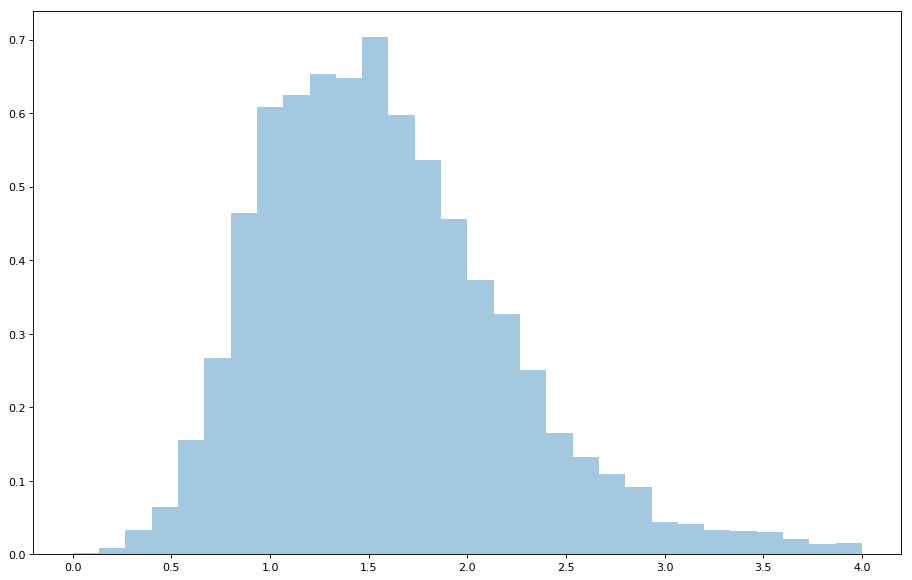

In [37]:
def clust_wd_sobt(wd,sobt,local):
    dw_t_h = abpc['DWELL TIME'].loc[(abpc['DEPARTURE SOBT CLUSTER']==sobt)&(abpc['DEPARTURE SOBT WEEKDAY']==wd)&(abpc['LOCAL']==local)]
    return dw_t_h


cluster_prueba = clust_wd_sobt(2,'A',False)
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(cluster_prueba,30,range=(0,4),density=True,histtype='stepfilled', alpha=0.4)

### Predicciones 

In [38]:
data_X = cluster_prueba
num_train = int(data_X.count()/5*4)
data_X_train_ = data_X[0:num_train] #Train
data_X_test_ = data_X[num_train:] #Test

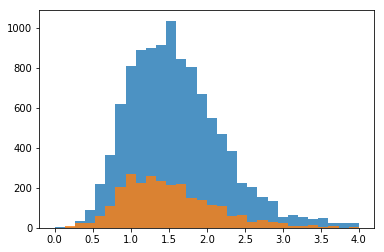

In [39]:
n_train_, bins_train, patchs_train = plt.hist(data_X_train_,30,range=[0,4],alpha=0.8)
n_test_, bins_test, patchs_test = plt.hist(data_X_test_,30,range=[0,4],alpha=0.8)

In [40]:
tot_train = sum(n_train_)
n_train = list(map(lambda x: x/tot_train,n_train_))
tot_test = sum(n_test_)
n_test = list(map(lambda x: x/tot_test,n_test_))

In [41]:
bins_train_ = []
for i in range(0,len(bins_train)-1):
    bins_train_.append((bins_train[i]+bins_train[i+1])/2)

bins_test_ = []
for i in range(0,len(bins_test)-1):
    bins_test_.append((bins_test[i]+bins_test[i+1])/2)

<BarContainer object of 30 artists>

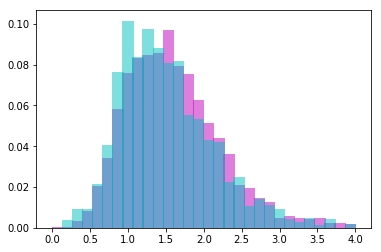

In [42]:
plt.bar(bins_train_,n_train,width=0.15,color='m',alpha=0.5)
plt.bar(bins_test_,n_test,width=0.15,color='c',alpha=0.5)

In [43]:
bins_train_M = np.array([bins_train_]).transpose()

regressor = RandomForestRegressor(n_estimators=150)
regressor.fit(bins_train_M,n_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<BarContainer object of 30 artists>

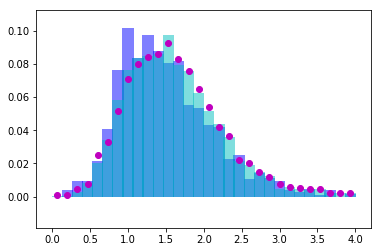

In [44]:
bins_test_M = np.array([bins_test_]).transpose()

plt.scatter(bins_test_M,regressor.predict(bins_test_M),color='m',zorder=5)
plt.bar(bins_test_,n_test,width=0.15,color='b',alpha=0.5)
plt.bar(bins_train_,n_train,width=0.15,color='c',alpha=0.5)

In [45]:
regressor.score(bins_test_M,n_test)

0.9121483548566522